In [1]:
import datetime
from pathlib import Path
from typing import Union

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.backends.backend_pgf import FigureCanvasPgf

matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
sns.set_theme()
plt.rcParams.update({
    'pgf.texsystem': 'pdflatex',
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'pgf.preamble': '\\usepackage{lmodern}',
})

frames = [
    pd.read_csv(Path.cwd().joinpath('data/linz_20100101_20131231.csv'), index_col='time', parse_dates=True),
    pd.read_csv(Path.cwd().joinpath('data/linz_20140101_20171231.csv'), index_col='time', parse_dates=True),
    pd.read_csv(Path.cwd().joinpath('data/linz_20180101_20211231.csv'), index_col='time', parse_dates=True)
]
df = pd.concat(frames)
df.index = df.index.tz_convert(None)
df

,station,DD,DD_FLAG,FFAM,FFAM_FLAG,P,P0,P0_FLAG,P_FLAG,RF,RF_FLAG,RR,RR_FLAG,SO,SO_FLAG,TL,TL_FLAG,TP,TP_FLAG
time,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,3202,312.0,100.0,0.5,100.0,962.4,994.0,0.0,100.0,96.0,100.0,0.0,100.0,0.0,100.0,5.4,100.0,NaN,0.0
2010-01-01 00:10:00,3202,123.0,100.0,0.5,100.0,962.4,994.0,0.0,100.0,96.0,100.0,0.0,100.0,0.0,100.0,5.6,100.0,NaN,0.0
2010-01-01 00:20:00,3202,125.0,100.0,0.7,100.0,962.3,993.9,0.0,100.0,96.0,100.0,0.0,100.0,0.0,100.0,5.7,100.0,NaN,0.0
2010-01-01 00:30:00,3202,213.0,100.0,0.8,100.0,962.3,993.9,0.0,100.0,96.0,100.0,0.0,100.0,0.0,100.0,5.6,100.0,NaN,0.0
2010-01-01 00:40:00,3202,226.0,100.0,0.9,100.0,962.3,993.9,0.0,100.0,96.0,100.0,0.0,100.0,0.0,100.0,5.6,100.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:10:00,3202,272.0,100.0,2.0,100.0,993.4,NaN,1.0,100.0,80.0,100.0,0.0,100.0,0.0,100.0,10.3,100.0,7.0,0.0
2021-12-31 23:20:00,3202,256.0,100.0,2.0,100.0,993.5,NaN,1.0,100.0,79.0,100.0,0.0,100.0,0.0,100.0,10.5,100.0,6.9,0.0
2021-12-31 23:30:00,3202,276.0,100.0,1.9,100.0,993.6,NaN,1.0,100.0,78.0,100.0,0.0,100.0,0.0,100.0,10.5,100.0,6.8,0.0


In [2]:
def get_unique_column_values(df: pd.DataFrame) -> [str]:
    # returns a list of all columns in the dataframe that contain only one unique value (i.e. all rows are equal)
    # cf. https://stackoverflow.com/a/54405767
    def is_unique(s: pd.Series):
        a = s.to_numpy()
        return (a[0] == a).all()

    result = []
    for col in df.columns:
        if is_unique(df[col]):
            print(f'Column {col} has only a single value: {df[col][0]}')
            result.append(col)

    return result


def remove_duplicate_indices(df: Union[pd.DataFrame, pd.Series]) -> Union[pd.DataFrame, pd.Series]:
    duplicates = df[df.index.duplicated(keep=False)]
    if duplicates.empty:
        print('There are no duplicate indices')
        return df
    print('Duplicated indices:')
    print(duplicates.index)

    remove = df.index.duplicated(keep='last')
    return df[~remove]


# Remove columns without any information and duplicate indices
df.drop(columns=get_unique_column_values(df), inplace=True)
df = remove_duplicate_indices(df)
df

Column station has only a single value: 3202
There are no duplicate indices


,DD,DD_FLAG,FFAM,FFAM_FLAG,P,P0,P0_FLAG,P_FLAG,RF,RF_FLAG,RR,RR_FLAG,SO,SO_FLAG,TL,TL_FLAG,TP,TP_FLAG
time,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,312.0,100.0,0.5,100.0,962.4,994.0,0.0,100.0,96.0,100.0,0.0,100.0,0.0,100.0,5.4,100.0,NaN,0.0
2010-01-01 00:10:00,123.0,100.0,0.5,100.0,962.4,994.0,0.0,100.0,96.0,100.0,0.0,100.0,0.0,100.0,5.6,100.0,NaN,0.0
2010-01-01 00:20:00,125.0,100.0,0.7,100.0,962.3,993.9,0.0,100.0,96.0,100.0,0.0,100.0,0.0,100.0,5.7,100.0,NaN,0.0
2010-01-01 00:30:00,213.0,100.0,0.8,100.0,962.3,993.9,0.0,100.0,96.0,100.0,0.0,100.0,0.0,100.0,5.6,100.0,NaN,0.0
2010-01-01 00:40:00,226.0,100.0,0.9,100.0,962.3,993.9,0.0,100.0,96.0,100.0,0.0,100.0,0.0,100.0,5.6,100.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:10:00,272.0,100.0,2.0,100.0,993.4,NaN,1.0,100.0,80.0,100.0,0.0,100.0,0.0,100.0,10.3,100.0,7.0,0.0
2021-12-31 23:20:00,256.0,100.0,2.0,100.0,993.5,NaN,1.0,100.0,79.0,100.0,0.0,100.0,0.0,100.0,10.5,100.0,6.9,0.0
2021-12-31 23:30:00,276.0,100.0,1.9,100.0,993.6,NaN,1.0,100.0,78.0,100.0,0.0,100.0,0.0,100.0,10.5,100.0,6.8,0.0


We will predict the air temperature measurements 2m above ground ("TL").
Possible input attributes are air temperature (TL), air pressure (P), reduced air pressure (P0), wind direction (DD), mean wind speed (FFAM), relative humidity (RF), precipitation (RR), sun shine duration (SO), and dew point (TP).
In the parameter study we only use air temperature, air pressure, relative humidity, and sunshine duration.
Therefore, we remove the other columns.

In [3]:
# first, we check whether the index is indeed complete (every 10 minutes)
complete = (df.index == pd.date_range(df.index.min(), df.index.max(), freq='10min')).all(axis=0)
print(f'Dataset ranging from {df.index.min()} to {df.index.max()} in 10-minute steps: {complete}')
df = df.reindex(columns=['TL', 'TL_FLAG', 'P', 'P_FLAG', 'RF', 'RF_FLAG', 'SO', 'SO_FLAG'], copy=False)
df

Dataset ranging from 2010-01-01 00:00:00 to 2021-12-31 23:50:00 in 10-minute steps: True


,TL,TL_FLAG,P,P_FLAG,RF,RF_FLAG,SO,SO_FLAG
time,,,,,,,,
2010-01-01 00:00:00,5.4,100.0,962.4,100.0,96.0,100.0,0.0,100.0
2010-01-01 00:10:00,5.6,100.0,962.4,100.0,96.0,100.0,0.0,100.0
2010-01-01 00:20:00,5.7,100.0,962.3,100.0,96.0,100.0,0.0,100.0
2010-01-01 00:30:00,5.6,100.0,962.3,100.0,96.0,100.0,0.0,100.0
2010-01-01 00:40:00,5.6,100.0,962.3,100.0,96.0,100.0,0.0,100.0
...,...,...,...,...,...,...,...,...
2021-12-31 23:10:00,10.3,100.0,993.4,100.0,80.0,100.0,0.0,100.0
2021-12-31 23:20:00,10.5,100.0,993.5,100.0,79.0,100.0,0.0,100.0
2021-12-31 23:30:00,10.5,100.0,993.6,100.0,78.0,100.0,0.0,100.0


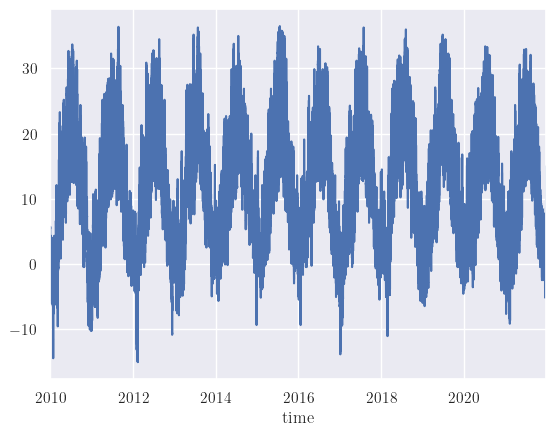

In [4]:
df['TL'].plot()
plt.show()

In [5]:
# we only have some missing values (~0.1%)
df[df.isna().any(axis=1)]

,TL,TL_FLAG,P,P_FLAG,RF,RF_FLAG,SO,SO_FLAG
time,,,,,,,,
2010-02-08 05:10:00,-3.4,500.0,983.8,500.0,71.0,500.0,NaN,200.0
2010-05-18 21:40:00,8.2,500.0,991.9,500.0,90.0,500.0,NaN,200.0
2010-06-05 01:20:00,12.3,500.0,990.9,500.0,92.0,500.0,NaN,200.0
2010-07-06 23:00:00,15.4,500.0,991.8,500.0,81.0,500.0,NaN,200.0
2010-12-07 18:00:00,1.5,500.0,973.0,500.0,98.0,300.0,NaN,200.0
...,...,...,...,...,...,...,...,...
2012-07-25 06:40:00,20.4,100.0,984.2,100.0,74.0,100.0,NaN,200.0
2015-04-14 18:00:00,16.5,500.0,993.1,500.0,44.0,500.0,NaN,0.0
2015-05-11 22:20:00,13.0,500.0,993.6,500.0,64.0,500.0,NaN,0.0


In [6]:
# we have some small gaps for sun shine duration which we can fill with linear interpolation up to 2 hours
df = df.interpolate(method='linear', limit=11, limit_area='inside')
gaps = df[df.isna().any(axis=1)]
gaps

,TL,TL_FLAG,P,P_FLAG,RF,RF_FLAG,SO,SO_FLAG
time,,,,,,,,
2012-07-24 19:10:00,26.3,100.0,984.8,100.0,47.0,100.0,NaN,0.0
2012-07-24 19:20:00,26.0,100.0,984.8,100.0,48.0,100.0,NaN,0.0
2012-07-24 19:30:00,25.6,100.0,984.9,100.0,49.0,100.0,NaN,0.0
2012-07-24 19:40:00,25.5,100.0,984.9,100.0,49.0,100.0,NaN,0.0
2012-07-24 19:50:00,25.6,100.0,984.9,100.0,48.0,100.0,NaN,0.0
...,...,...,...,...,...,...,...,...
2012-07-25 06:00:00,20.5,100.0,984.0,100.0,74.0,100.0,NaN,200.0
2012-07-25 06:10:00,20.6,100.0,984.0,100.0,74.0,100.0,NaN,200.0
2012-07-25 06:20:00,20.6,100.0,984.1,100.0,73.0,100.0,NaN,200.0


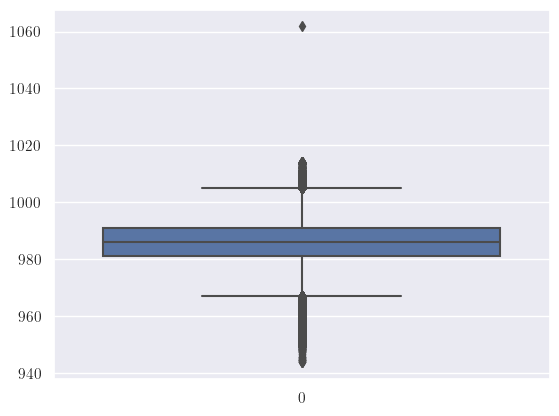

In [7]:
# there's an outlier for the pressure value
sns.boxplot(df['P'])
df.loc['2016-11-24 14:50:00', 'P'] = 987.8

In [8]:
# we still have some bigger gaps in the data concentrated on a few days
# interpolation is not sufficient, as we cannot interpolate over a gap of multiple days.
gap_days = gaps.index.map(pd.Timestamp.date).unique()
print('Missing values on :')
for day in gap_days:
    daily = df.loc[str(day)]
    missing = daily[daily.isna().any(axis=1)]
    print(f'{day}: {len(missing)}\t(={len(missing) / (60 / 10 * 24) * 100:.2f}%)')

Missing values on :
2012-07-24: 29	(=20.14%)
2012-07-25: 41	(=28.47%)


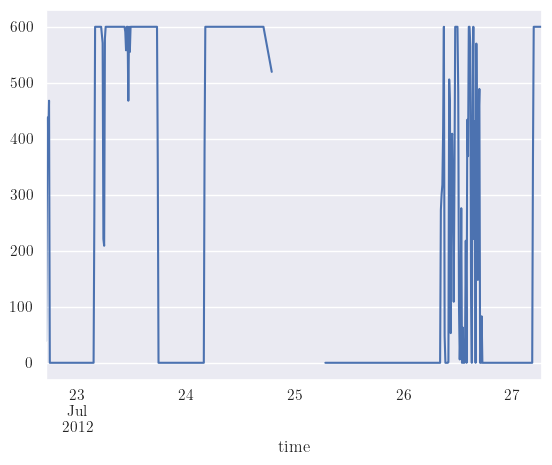

In [9]:
# let's look at the gaps one after another
from datetime import datetime, timedelta


def extend_gap(gap: slice, delta: timedelta):
    return slice(datetime.fromisoformat(gap.start) - delta, datetime.fromisoformat(gap.stop) + delta)


# the first one has only missing sun shine duration
gap = slice('2012-07-24 17:10:00', '2012-07-25 06:40:00')
df.loc[extend_gap(gap, timedelta(hours=48)), 'SO'].plot()
plt.show()
# it is reasonable that the sun stopped shining at 17:10, similar to the previous day
df.loc[gap, 'SO'] = 0

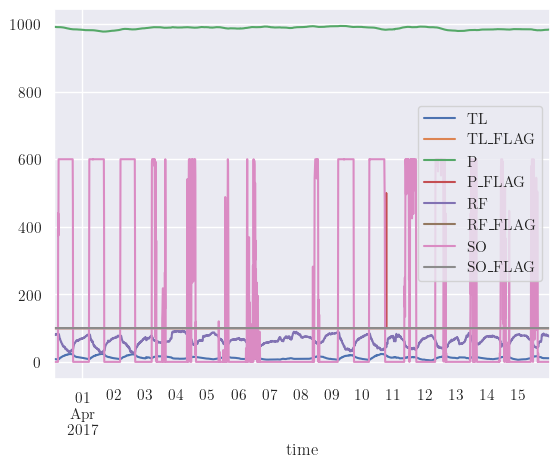

In [10]:
# and then we have one big gap where all data is missing
# %matplotlib qt
gap = slice('2017-04-06 01:50:00', '2017-04-09 23:50:00')
df.loc[extend_gap(gap, timedelta(hours=144))].plot()
plt.show()
# we cannot identify a significant weather change in these 4 days, hence we use the average of the last 3 days
for dt in pd.date_range(gap.start, gap.stop, freq='10min'):
    past_hours = [24, 48, 72]
    df.loc[dt] = 0
    for h in past_hours:
        df.loc[dt] += df.loc[dt - timedelta(h)]
    df.loc[dt] /= len(past_hours)
# %matplotlib inline

In [11]:
# do a simple plausibility check of the final data (flag values above 300 indicate a potential faulty measurement)
df[(df['TL'] < -15) | (df['TL'] > 40) | (df['TL_FLAG'] > 300) | (df['RF_FLAG'] > 300) | (df['P_FLAG'] > 300)]

,TL,TL_FLAG,P,P_FLAG,RF,RF_FLAG,SO,SO_FLAG
time,,,,,,,,
2010-01-16 11:50:00,1.6,500.0,992.0,500.0,73.0,500.0,600.0,300.0
2010-02-08 05:10:00,-3.4,500.0,983.8,500.0,71.0,500.0,0.0,200.0
2010-02-17 10:20:00,1.7,500.0,967.9,500.0,70.0,500.0,600.0,300.0
2010-05-18 21:40:00,8.2,500.0,991.9,500.0,90.0,500.0,0.0,200.0
2010-06-05 01:20:00,12.3,500.0,990.9,500.0,92.0,500.0,0.0,200.0
...,...,...,...,...,...,...,...,...
2018-12-07 08:50:00,5.6,500.0,986.8,500.0,91.0,500.0,0.0,100.0
2019-02-24 07:10:00,-2.5,500.0,1007.5,500.0,65.0,500.0,8.0,300.0
2019-04-06 03:40:00,8.7,300.0,974.1,500.0,84.0,500.0,0.0,100.0


In [12]:
# remove the remaining flag attributes and arrive at a dataset without null values
df.drop(columns=['TL_FLAG', 'P_FLAG', 'RF_FLAG', 'SO_FLAG'], inplace=True)
print(f'Remaining NaN values: {df[df.isna().any(axis=1)]}')
# also check the high-level metrics whether they make sense
df.describe()

Remaining NaN values: Empty DataFrame
Columns: [TL, P, RF, SO]
Index: []


,TL,P,RF,SO
count,631152.000000,631152.000000,631152.000000,631152.000000
mean,11.021496,985.868872,75.113716,128.006593
std,8.532066,7.876064,17.574978,236.772340
min,-15.100000,943.700000,12.000000,0.000000
25%,4.100000,981.300000,63.000000,0.000000
50%,10.700000,986.000000,79.000000,0.000000
75%,17.400000,990.800000,90.000000,17.000000
max,36.500000,1014.200000,100.000000,600.000000


In [13]:
# in the correlation matrix we see that all attributes are quite unique
# the correlation between relative humidity, sunshine duration and temperature is plausible
df.corr()

,TL,P,RF,SO
TL,1.000000,-0.120339,-0.549491,0.427064
P,-0.120339,1.000000,0.006921,0.031783
RF,-0.549491,0.006921,1.000000,-0.576889
SO,0.427064,0.031783,-0.576889,1.000000


In [14]:
df.to_pickle(Path.cwd().joinpath('zamg_linz.pickle'))
df

,TL,P,RF,SO
time,,,,
2010-01-01 00:00:00,5.4,962.4,96.0,0.0
2010-01-01 00:10:00,5.6,962.4,96.0,0.0
2010-01-01 00:20:00,5.7,962.3,96.0,0.0
2010-01-01 00:30:00,5.6,962.3,96.0,0.0
2010-01-01 00:40:00,5.6,962.3,96.0,0.0
...,...,...,...,...
2021-12-31 23:10:00,10.3,993.4,80.0,0.0
2021-12-31 23:20:00,10.5,993.5,79.0,0.0
2021-12-31 23:30:00,10.5,993.6,78.0,0.0


In [15]:
# when we sample hourly data we need to sum up the sunshine duration and precipitation for 1 hour
df['SO'] = df['SO'].rolling(6).sum()
df = df.iloc[6:, :]  # remove created NaN entries (start with next full hour)
df.to_pickle(Path.cwd().joinpath('zamg_linz_hourly.pickle'))
df

,TL,P,RF,SO
time,,,,
2010-01-01 01:00:00,5.5,962.0,96.0,0.0
2010-01-01 01:10:00,5.4,962.0,96.0,0.0
2010-01-01 01:20:00,5.4,962.1,96.0,0.0
2010-01-01 01:30:00,5.4,962.0,97.0,0.0
2010-01-01 01:40:00,5.4,961.9,97.0,0.0
...,...,...,...,...
2021-12-31 23:10:00,10.3,993.4,80.0,0.0
2021-12-31 23:20:00,10.5,993.5,79.0,0.0
2021-12-31 23:30:00,10.5,993.6,78.0,0.0


<AxesSubplot: >

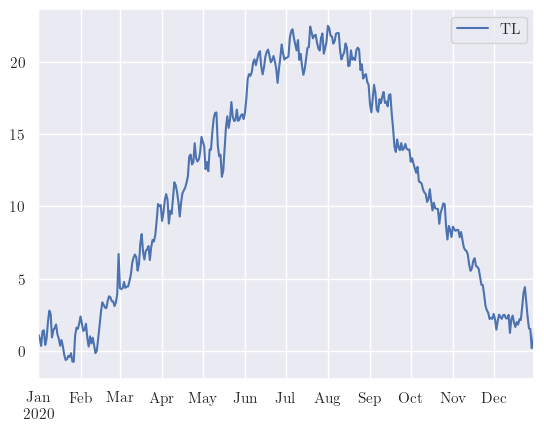

In [16]:
# let's plot the yearly averages of the data
climate: pd.Series = df['TL'].groupby([df.index.month, df.index.day]).mean()
climate: pd.DataFrame = pd.DataFrame(columns=['TL'], data=climate.values,
                                     index=pd.date_range('2020-01-01', '2020-12-31'))
climate.plot()

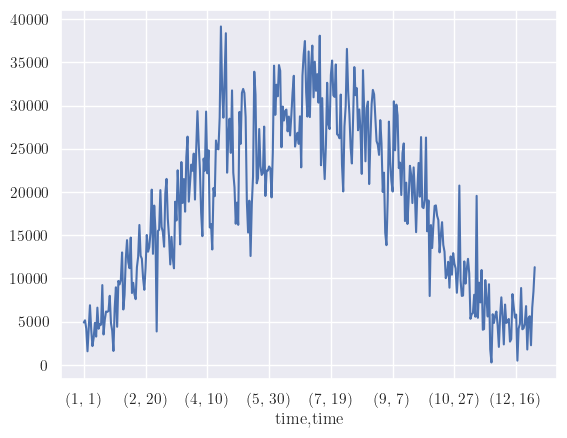

time  time
1     1        4912.083333
      2        5162.083333
      3        4194.333333
      4        1577.916667
      5        4186.000000
                  ...     
12    27       5636.166667
      28       2274.833333
      29       6621.416667
      30       8505.416667
      31      11308.916667
Name: SO, Length: 366, dtype: float64

In [17]:
# first calculate the total sunshine duration per day and undo the rolling hourly sum
daily_sunshine: pd.Series = df['SO'].groupby([df.index.year, df.index.month, df.index.day]).sum() / 6
# then take the mean over all years
sunshine = daily_sunshine.groupby(level=[1, 2]).mean()
sunshine.plot()
plt.show()
sunshine